In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
data_path = "/kaggle/input/live-csv/Live (1).csv"

In [42]:
data = pd.read_csv(data_path)

In [43]:
data.dtypes

num_reactions         float64
num_comments          float64
num_shares            float64
num_likes             float64
num_loves             float64
num_wows              float64
num_hahas             float64
num_sads              float64
num_angrys            float64
status_type_link      float64
status_type_photo     float64
status_type_status    float64
status_type_video     float64
dtype: object

In [44]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,7050.0,0.048857,0.098222,0.0,0.003609,0.012633,0.046497,1.0
num_comments,7050.0,0.010689,0.042384,0.0,0.000000,0.000191,0.001096,1.0
num_shares,7050.0,0.011689,0.038435,0.0,0.000000,0.000000,0.001168,1.0
num_likes,7050.0,0.045657,0.095429,0.0,0.003609,0.012314,0.039225,1.0
num_loves,7050.0,0.019374,0.060842,0.0,0.000000,0.000000,0.004566,1.0
num_wows,7050.0,0.004638,0.031366,0.0,0.000000,0.000000,0.000000,1.0
num_hahas,7050.0,0.004436,0.025205,0.0,0.000000,0.000000,0.000000,1.0
num_sads,7050.0,0.004778,0.031317,0.0,0.000000,0.000000,0.000000,1.0
num_angrys,7050.0,0.003651,0.023446,0.0,0.000000,0.000000,0.000000,1.0
status_type_link,7050.0,0.008936,0.094115,0.0,0.000000,0.000000,0.000000,1.0


In [45]:
model = KMeans(n_clusters=3)

In [46]:
model.fit(data)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [47]:
labels = model.predict(data)

In [48]:
np.unique(labels, return_counts=True)

(array([0, 1, 2], dtype=int32), array([4288, 2334,  428]))

In [49]:
silhouettes = []
ks = list(range(2,12))

In [50]:
for n_cluster in ks:
    kmeans = KMeans(n_clusters=n_cluster, n_init=10).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric="euclidean")
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))
    silhouettes.append(sil_coeff)

For n_clusters=2, The Silhouette Coefficient is 0.8188237721696822
For n_clusters=3, The Silhouette Coefficient is 0.8972493682244883
For n_clusters=4, The Silhouette Coefficient is 0.9106664962327088
For n_clusters=5, The Silhouette Coefficient is 0.8866768371183754
For n_clusters=6, The Silhouette Coefficient is 0.8430118288915796
For n_clusters=7, The Silhouette Coefficient is 0.8419421782294257
For n_clusters=8, The Silhouette Coefficient is 0.7658841617058691
For n_clusters=9, The Silhouette Coefficient is 0.7601867631720509
For n_clusters=10, The Silhouette Coefficient is 0.7183294791821582
For n_clusters=11, The Silhouette Coefficient is 0.7169827578174617


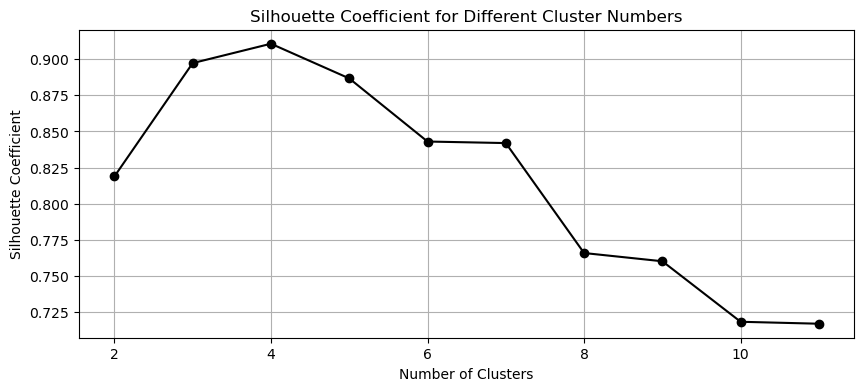

In [51]:
plt.figure(figsize=(10, 4))
plt.plot(ks, silhouettes, marker='o', c="k")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title("Silhouette Coefficient for Different Cluster Numbers")
plt.grid(True)

In [52]:
model = KMeans(n_clusters=4, n_init=10)

In [53]:
model.fit(data)

KMeans(n_clusters=4, n_init=10)

In [54]:
labels = model.predict(data)

In [55]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([2334, 4288,  365,   63]))

In [68]:
data["labels"] = labels
data["labels"].value_counts()

1    4288
0    2334
2     365
3      63
Name: labels, dtype: int64

In [57]:
group_zero = data[data["labels"] == 0]["num_comments"].mean()
group_zero

0.030608773182480054

In [58]:
group_one = data[data["labels"] == 1]["num_comments"].mean()
group_one

0.0007619566531325948

In [59]:
group_two = data[data["labels"] == 2]["num_comments"].mean()
group_two

0.0017264581307471548

In [60]:
group_three = data[data["labels"] == 3]["num_comments"].mean()
group_three

0.00027148226290672723

In [61]:
group_zero = data[data["labels"] == 0]["num_shares"].mean()
group_zero

0.033785031713235436

In [62]:
group_one = data[data["labels"] == 1]["num_shares"].mean()
group_one

0.0007458736181824375

In [63]:
group_two = data[data["labels"] == 2]["num_shares"].mean()
group_two

0.0007473434899500528

In [64]:
group_three = data[data["labels"] == 3]["num_shares"].mean()
group_three

0.001284119566829822

In [65]:
data.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video,labels
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0,0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0,0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,1


In [66]:
status_type = data[["status_type_photo","status_type_video"]].idxmax(axis=1)
data = pd.concat([data["labels"], status_type.rename("status_type")], axis=1)

In [67]:
data.groupby(["labels", "status_type"])["status_type"].count()

labels  status_type      
0       status_type_video    2334
1       status_type_photo    4288
2       status_type_photo     365
3       status_type_photo      63
Name: status_type, dtype: int64